In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('./merged_df_v3.csv')
df

,ID,time,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin,...,avg_windgusts_10m,avg_soil_temperature_0_to_7cm,avg_soil_temperature_7_to_28cm,avg_soil_temperature_28_to_100cm,avg_soil_temperature_100_to_255cm,avg_soil_moisture_0_to_7cm,avg_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_precipitation
0,804,9/16/1998 0:00,0,NaN,TD,10.0,-28.1,30,1009.0,north_atlantic,...,43.15,28.40,28.40,28.40,28.40,0.0,0.0,0.00,0.0,0.0
1,980,9/14/2002 18:00,0,NaN,TD,10.0,-60.5,25,1009.0,north_atlantic,...,22.08,29.40,29.40,29.40,29.40,0.0,0.0,0.00,0.0,0.0
2,923,9/21/2002 18:00,0,NaN,TD,10.2,-44.6,25,1009.0,north_atlantic,...,24.03,28.90,28.90,28.90,28.90,0.0,0.0,0.00,0.0,0.0
3,1135,9/5/2004 18:00,0,NaN,HU,10.2,-46.8,110,955.0,north_atlantic,...,51.42,29.88,29.94,29.94,29.94,0.0,0.0,0.00,0.0,0.0
4,981,9/15/2002 0:00,0,NaN,TD,10.2,-62.4,25,1009.0,north_atlantic,...,24.15,26.84,27.02,27.00,26.70,0.5,0.5,0.49,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1124,9/3/2004 0:00,0,NaN,TD,9.7,-28.7,30,1007.0,north_atlantic,...,38.55,28.18,28.26,28.24,28.24,0.0,0.0,0.00,0.0,0.0
2727,1125,9/3/2004 6:00,0,NaN,TS,9.7,-30.3,35,1005.0,north_atlantic,...,42.60,28.08,28.22,28.22,28.22,0.0,0.0,0.00,0.0,0.0
2728,803,9/15/1998 18:00,0,NaN,TD,9.8,-26.5,30,1009.0,north_atlantic,...,48.27,28.20,28.16,28.16,28.16,0.0,0.0,0.00,0.0,0.0
2729,1134,9/5/2004 12:00,0,NaN,HU,9.8,-45.1,85,977.0,north_atlantic,...,56.93,29.39,29.44,29.44,29.44,0.0,0.0,0.00,0.0,0.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731 entries, 0 to 2730
Columns: 116 entries, ID to min_precipitation
dtypes: float64(94), int64(10), object(12)
memory usage: 2.4+ MB


In [69]:
na_counts = df.isna().sum()
na_columns = na_counts[na_counts > 0]
na_columns


special                  2533
mslp                        2
elevation                1507
min_precipitationmin_    2731
min_snow_depth           1965
max_snow_depth           1965
avg_snow_depth           1965
dtype: int64

In [70]:
df.describe()

,ID,extra_obs,lat,lon,vmax,mslp,year,Total CPI-Adjusted Cost (Millions of Dollars),Deaths,elevation,...,avg_windgusts_10m,avg_soil_temperature_0_to_7cm,avg_soil_temperature_7_to_28cm,avg_soil_temperature_28_to_100cm,avg_soil_temperature_100_to_255cm,avg_soil_moisture_0_to_7cm,avg_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_precipitation
count,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2729.000000,2731.000000,2731.000000,2731.000000,1224.000000,...,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000
mean,1366.887221,0.064079,25.818198,-72.676456,64.077261,980.961891,2006.459905,25829.947492,136.037349,88.199346,...,60.362501,26.296921,26.541066,26.672413,26.184248,0.123050,0.116360,0.096034,0.098081,0.180227
std,789.677083,0.244939,9.432526,17.134033,34.956670,26.350280,11.547392,39341.299210,497.585671,179.264071,...,27.582044,4.153745,4.097459,4.078687,4.564984,0.188247,0.181103,0.153494,0.157938,0.487008
min,0.000000,0.000000,8.900000,-106.700000,10.000000,882.000000,1980.000000,1050.600000,0.000000,-5.000000,...,8.320000,3.840000,4.060000,4.060000,4.060000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,682.500000,0.000000,18.300000,-85.300000,35.000000,962.000000,1998.000000,2585.300000,11.000000,0.000000,...,39.200000,25.280000,25.735000,26.100000,25.470000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1367.000000,0.000000,25.000000,-76.200000,55.000000,990.000000,2005.000000,9713.600000,35.000000,5.000000,...,54.860000,27.860000,28.060000,28.200000,28.100000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2050.500000,0.000000,31.350000,-63.500000,90.000000,1003.000000,2018.000000,29040.000000,57.000000,106.250000,...,79.885000,28.880000,28.940000,29.000000,28.940000,0.330000,0.290000,0.220000,0.210000,0.100000
max,2734.000000,1.000000,64.000000,-9.900000,165.000000,1018.000000,2022.000000,195046.100000,2981.000000,2061.000000,...,152.260000,32.920000,33.060000,34.130000,31.950000,0.760000,0.760000,0.690000,0.660000,4.600000


# Explore Cost Distribution

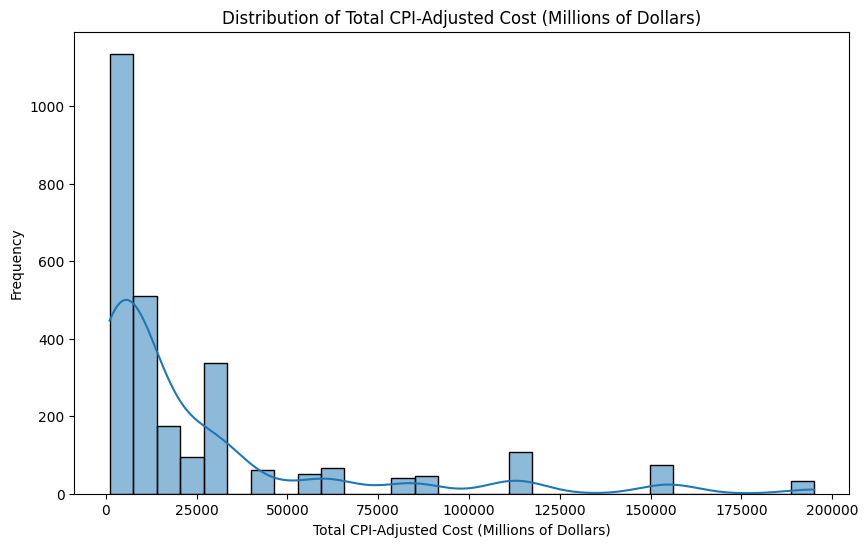

count      2731.000000
mean      25829.947492
std       39341.299210
min        1050.600000
25%        2585.300000
50%        9713.600000
75%       29040.000000
max      195046.100000
Name: Total CPI-Adjusted Cost (Millions of Dollars), dtype: float64

In [71]:
# Explore the distribution of 'Total CPI-Adjusted Cost (Millions of Dollars)'

from datetime import datetime

df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

plt.figure(figsize=(10, 6))
sns.histplot(df['Total CPI-Adjusted Cost (Millions of Dollars)'], bins=30, kde=True)
plt.title('Distribution of Total CPI-Adjusted Cost (Millions of Dollars)')
plt.xlabel('Total CPI-Adjusted Cost (Millions of Dollars)')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics of 'Total CPI-Adjusted Cost (Millions of Dollars)'
cost_descriptive_stats = df['Total CPI-Adjusted Cost (Millions of Dollars)'].describe()

cost_descriptive_stats


# Explore Correlation

In [72]:
df

,ID,time,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin,...,avg_windgusts_10m,avg_soil_temperature_0_to_7cm,avg_soil_temperature_7_to_28cm,avg_soil_temperature_28_to_100cm,avg_soil_temperature_100_to_255cm,avg_soil_moisture_0_to_7cm,avg_soil_moisture_7_to_28cm,avg_soil_moisture_28_to_100cm,avg_soil_moisture_100_to_255cm,min_precipitation
0,804,1998-09-16 00:00:00,0,NaN,TD,10.0,-28.1,30,1009.0,north_atlantic,...,43.15,28.40,28.40,28.40,28.40,0.0,0.0,0.00,0.0,0.0
1,980,2002-09-14 18:00:00,0,NaN,TD,10.0,-60.5,25,1009.0,north_atlantic,...,22.08,29.40,29.40,29.40,29.40,0.0,0.0,0.00,0.0,0.0
2,923,2002-09-21 18:00:00,0,NaN,TD,10.2,-44.6,25,1009.0,north_atlantic,...,24.03,28.90,28.90,28.90,28.90,0.0,0.0,0.00,0.0,0.0
3,1135,2004-09-05 18:00:00,0,NaN,HU,10.2,-46.8,110,955.0,north_atlantic,...,51.42,29.88,29.94,29.94,29.94,0.0,0.0,0.00,0.0,0.0
4,981,2002-09-15 00:00:00,0,NaN,TD,10.2,-62.4,25,1009.0,north_atlantic,...,24.15,26.84,27.02,27.00,26.70,0.5,0.5,0.49,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1124,2004-09-03 00:00:00,0,NaN,TD,9.7,-28.7,30,1007.0,north_atlantic,...,38.55,28.18,28.26,28.24,28.24,0.0,0.0,0.00,0.0,0.0
2727,1125,2004-09-03 06:00:00,0,NaN,TS,9.7,-30.3,35,1005.0,north_atlantic,...,42.60,28.08,28.22,28.22,28.22,0.0,0.0,0.00,0.0,0.0
2728,803,1998-09-15 18:00:00,0,NaN,TD,9.8,-26.5,30,1009.0,north_atlantic,...,48.27,28.20,28.16,28.16,28.16,0.0,0.0,0.00,0.0,0.0
2729,1134,2004-09-05 12:00:00,0,NaN,HU,9.8,-45.1,85,977.0,north_atlantic,...,56.93,29.39,29.44,29.44,29.44,0.0,0.0,0.00,0.0,0.0


### Ensure Numeric Data: Make sure that you are only trying to calculate correlations with numeric data.
#### Creating a separate dataframe that only includes the numeric columns.

In [73]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

### Handle NaN Values: Make sure that the columns used in the correlation calculation do not contain NaN values. 
#### (might want to fill them with adifferent specific value)

In [74]:
df_numeric = df_numeric.fillna(df_numeric.median())  # Filling NaN with median

### Check Data Types: Ensure that 'Total CPI-Adjusted Cost (Millions of Dollars)' is of a numeric data type. 

In [75]:
df['Total CPI-Adjusted Cost (Millions of Dollars)'] = pd.to_numeric(df['Total CPI-Adjusted Cost (Millions of Dollars)'], errors='coerce')


### Run Correlation: Now try to run the correlation function on this numeric-only dataframe.
### Correlation Analysis

In [76]:
# Calculate correlations of all variables with the cost
correlation_with_cost = df_numeric.corr()['Total CPI-Adjusted Cost (Millions of Dollars)'].sort_values(ascending=False).drop('Total CPI-Adjusted Cost (Millions of Dollars)')

# Get top 5 positively correlated variables
top_pos_correlations = correlation_with_cost.head(5)

# Get top 5 negatively correlated variables (excluding NaN correlations)
top_neg_correlations = correlation_with_cost.tail(5).dropna()

# Extract variable names for further analysis
top_pos_corr_vars = top_pos_correlations.index.tolist()
top_neg_corr_vars = top_neg_correlations.index.tolist()


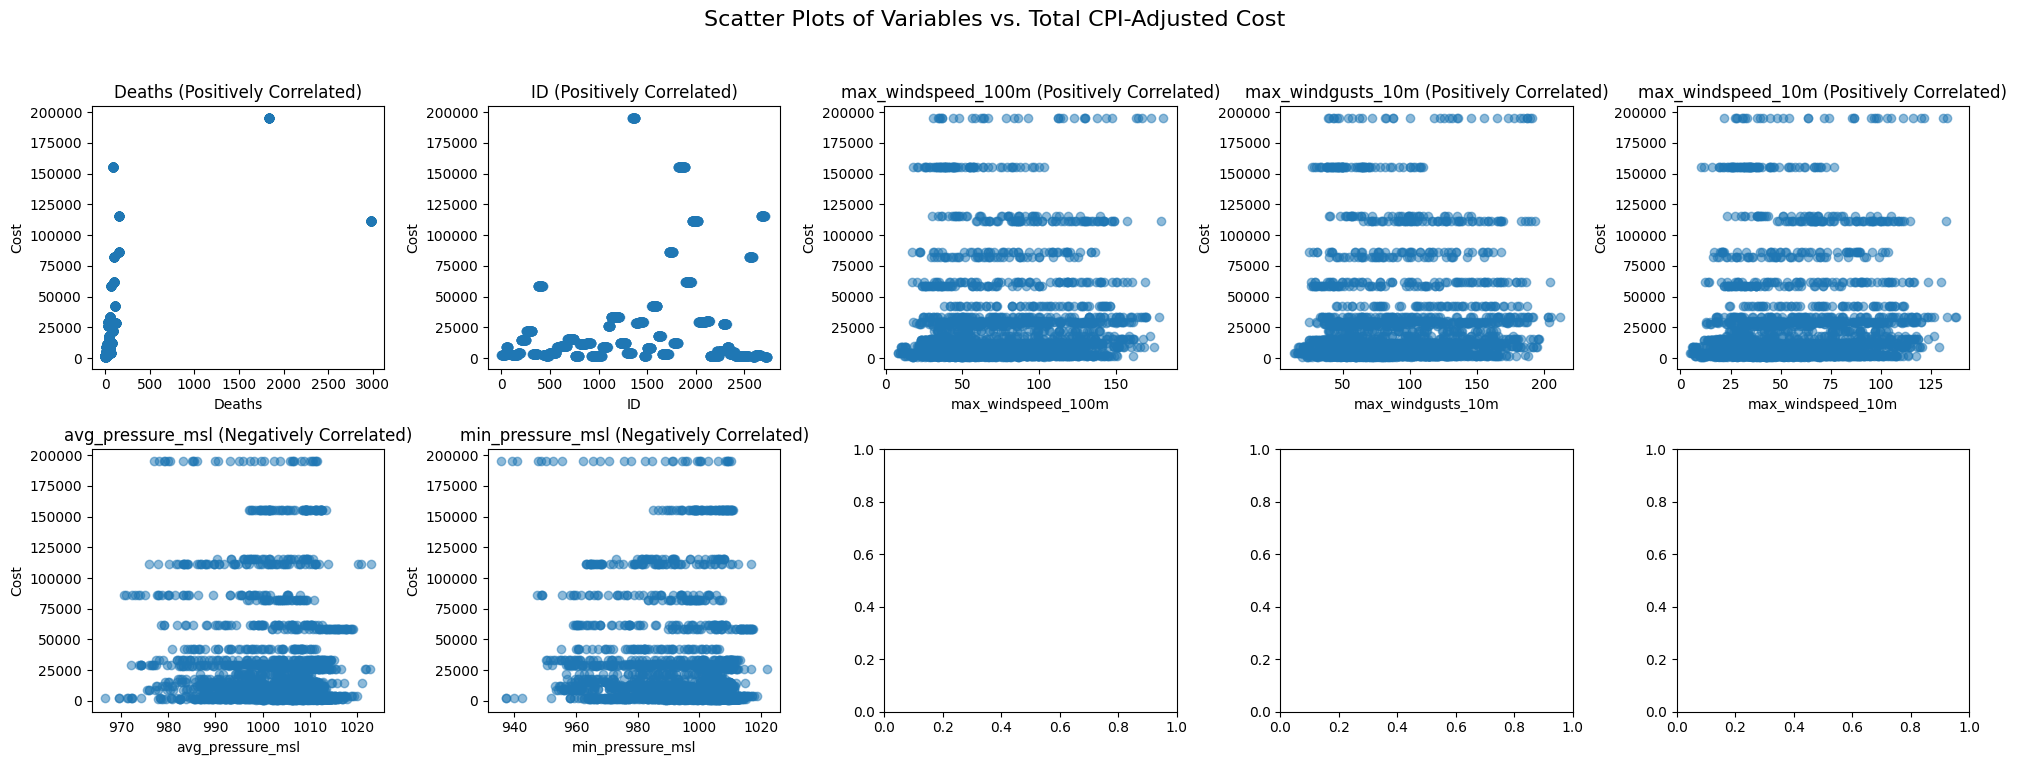

In [77]:

# Top 5 positively correlated features
top_pos_corr_vars = top_pos_correlations.index.tolist()

# Top 5 negatively correlated features (excluding NaN correlations)
top_neg_corr_vars = top_neg_correlations.dropna().index.tolist()

# Visualizing scatter plots of these variables against cost
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Scatter Plots of Variables vs. Total CPI-Adjusted Cost', fontsize=16)

for i, var in enumerate(top_pos_corr_vars):
    axes[0, i].scatter(df_numeric[var], df_numeric['Total CPI-Adjusted Cost (Millions of Dollars)'], alpha=0.5)
    axes[0, i].set_title(f'{var} (Positively Correlated)')
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Cost')

for i, var in enumerate(top_neg_corr_vars):
    axes[1, i].scatter(df_numeric[var], df_numeric['Total CPI-Adjusted Cost (Millions of Dollars)'], alpha=0.5)
    axes[1, i].set_title(f'{var} (Negatively Correlated)')
    axes[1, i].set_xlabel(var)
    axes[1, i].set_ylabel('Cost')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [78]:
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor